# **Actividad: Definición de Datos para el proyecto final**

## **Integrantes:**
- Benjamin De La Torre Rojas
- Mauricio David Correa Hernandez
- Vladlen Shatunov

### **Objetivo**
El objetivo de esta actividad es que los estudiantes identifiquen y extraigan los datos necesarios para desarrollar un modelo de aprendizaje de máquinas.
Se trabajará en la definición concreta del conjunto de datos, su formato y estructura, enfocándose en su obtención y presentación en un DataFrame de
Pandas.

El resultado final será un DataFrame con los datos listos para ser explorados en futuros pasos del
proyecto. Entregar Coolab con dataFrame definido, y archivo de Datos en caso de que sea necesario.

# **¿Qué es Machine Learning?**
Machine Learning, o aprendizaje automático, es una rama de la inteligencia artificial que permite a las computadoras aprender y mejorar a partir de la experiencia sin ser explícitamente programadas. A través de algoritmos y modelos matemáticos, las máquinas identifican patrones en los datos, lo que les permite hacer predicciones, tomar decisiones y realizar tareas con un mínimo de intervención humana. Se utiliza en una amplia variedad de aplicaciones, como reconocimiento de voz, análisis predictivo, sistemas de recomendación y más.

## **Tipos de Modelos en Machine Learning**
Existen diferentes tipos de modelos en machine learning, pero dos de los más comunes y fundamentales son los modelos de regresión y clasificación. Estos modelos se utilizan dependiendo del tipo de problema que se desea resolver.


### **1.   Modelos de Regresión**
Los modelos de regresión se utilizan para predecir valores continuos. El objetivo es encontrar una relación matemática que describa la relación entre las variables independientes (inputs) y la variable dependiente (output). Por ejemplo, la predicción del precio de una casa basada en características como el tamaño, la ubicación y el número de habitaciones es un problema típico de regresión. Los algoritmos comunes incluyen la regresión lineal, regresión polinómica y regresión de tipo árbol.
### **2.   Modelos de Clasificación**
Los modelos de clasificación se enfocan en predecir categorías o clases. Estos modelos son adecuados cuando el output esperado es discreto, es decir, pertenece a un conjunto limitado de categorías o etiquetas. Por ejemplo, clasificar correos electrónicos como "spam" o "no spam" o diagnosticar una enfermedad como "positivo" o "negativo" son ejemplos comunes de problemas de clasificación. Los algoritmos populares para clasificación incluyen regresión logística, máquinas de soporte vectorial (SVM) y redes neuronales.
### **3. Random Forest**
El modelo de Random Forest es un algoritmo de clasificación (aunque también puede usarse para regresión) que utiliza múltiples árboles de decisión para tomar una decisión final. Cada árbol en el bosque toma una decisión basada en una muestra aleatoria de los datos, y la predicción final se realiza a través de una votación entre todos los árboles. Esta técnica ayuda a mejorar la precisión del modelo y reduce el riesgo de sobreajuste, ya que se basa en el consenso de múltiples modelos en lugar de uno solo.



# **1. Definición del problema**
El problema que se desea resolver es la predicción del resultado de un partido de fútbol en la Premier League, específicamente si un equipo ganará o no. La intención es utilizar datos históricos de partidos para entrenar un modelo que pueda predecir el resultado futuro con base en diferentes factores y características del equipo y del juego.

# **Objetivo del modelo**
El objetivo del modelo es de clasificación, ya que busca clasificar el resultado del partido en una de dos categorías: 0 si el equipo perdió o empató, y 1 si el equipo ganó. La clasificación se basa en el análisis de patrones y características extraídas de los datos históricos de los partidos de la Premier League.

# **2. Fuente de datos**
Para desarrollar nuestro modelo de machine learning que predice el resultado de partidos de la Premier League, utilizaremos datos obtenidos de la página web [fbref.com](https://fbref.com/en/comps/9/Premier-League-Stats), una fuente confiable que ofrece estadísticas detalladas sobre el fútbol.

## **2.1 Descripción de la fuente de datos**

### **2.1.1. Origen:**
Los datos provienen de fbref.com, una plataforma conocida por su amplia colección de estadísticas de fútbol a nivel mundial.
### **2.1.2. Acceso:**
Los datos en fbref.com están disponibles al público de manera abierta y gratuita. Esto nos permite descargar y utilizar las estadísticas de partidos sin restricciones.
### **2.1.3. Formato de los datos:**
Descargaremos todos los partidos de varias temporadas en un formato estructurado, utilizando Python y su biblioteca requests.

## **2.2 Método de obtención y procesamiento de datos**

### **2.2.1 Descarga de datos:**
Utilizaremos la biblioteca requests de Python para acceder a la página web de fbref.com y extraer los datos necesarios sobre los partidos.

### **2.2.2 Análisis y limpieza:**
Una vez descargados, analizaremos y limpiaremos los datos utilizando BeautifulSoup para el análisis de HTML y pandas para la manipulación y estructuración de los datos.

### **2.2.3 Integración:**
Al finalizar el proceso, tendremos un único DataFrame de pandas que contendrá todos los partidos de la Premier League durante varias temporadas, listo para ser utilizado en nuestro modelo de machine learning.

Este enfoque nos asegurará contar con un conjunto de datos limpio y organizado, esencial para entrenar nuestro modelo de Random Forest.

In [ ]:
!pip install requests

Lo primero que harémos sera descargar el HTML de la pagina que muestra las clasificaciones en la Premier League.

Para hacerlo usaremos la biblioteca [request](https://pypi.org/project/requests/) de python

In [ ]:
import requests
standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

data = requests.get(standings_url)

Podemos ver que hemos extraido todo el codigo html de la pagina web.

Pero ahora debemos centrarnos en lo que enrealidad queremos obtener de la pagina.

Como podemos ver en la siguiente imagen, estamos viendo las estadisticas de la  temporada 2024-2025 de la Premier League

 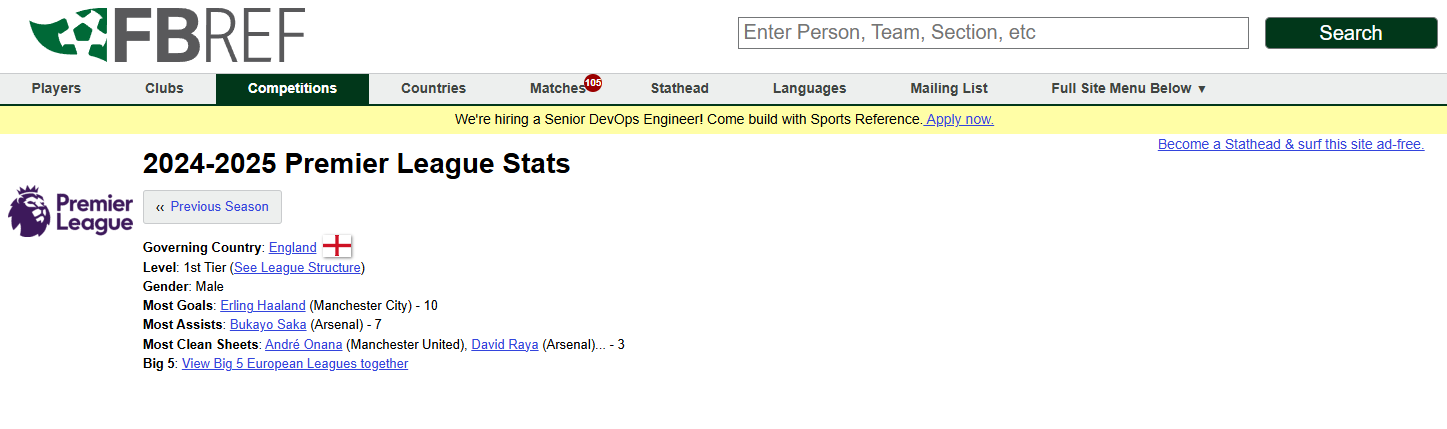

 y toda la informacion que queremos esta en esta tabla
 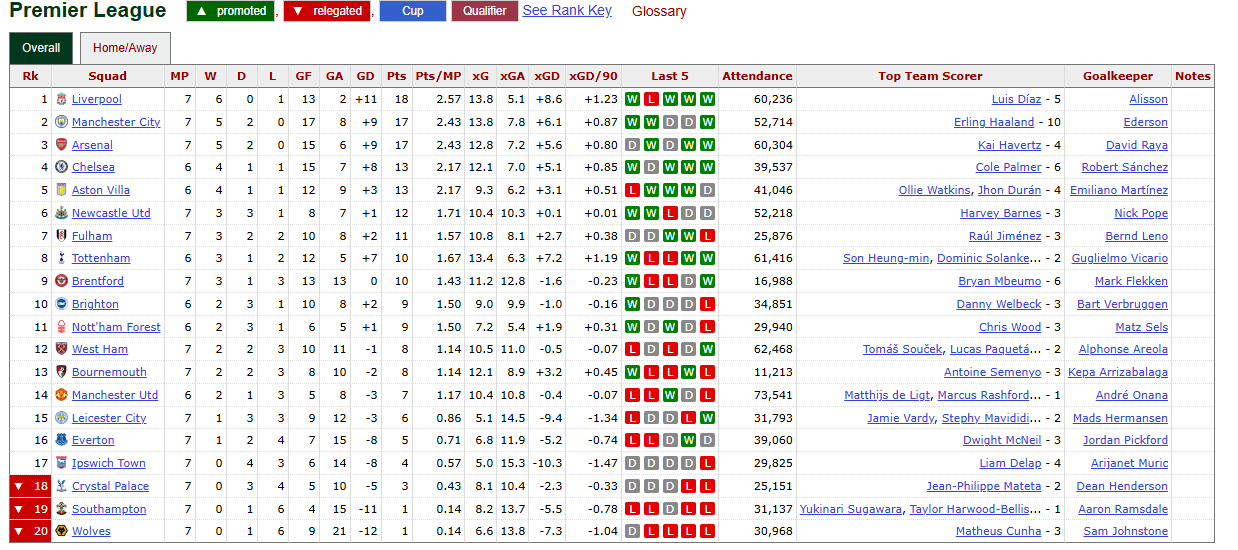

 esta lista cada equipo en la liga y sus estadisticas, lo que queremos es las urls de cada equipo para obtener el registro de partidos de ese equipo especifico.

 por ejemplo: si hago click en Liverpool, venimos a esta pagina y podemos ver todos sus partidos en la siguiente tabla.
 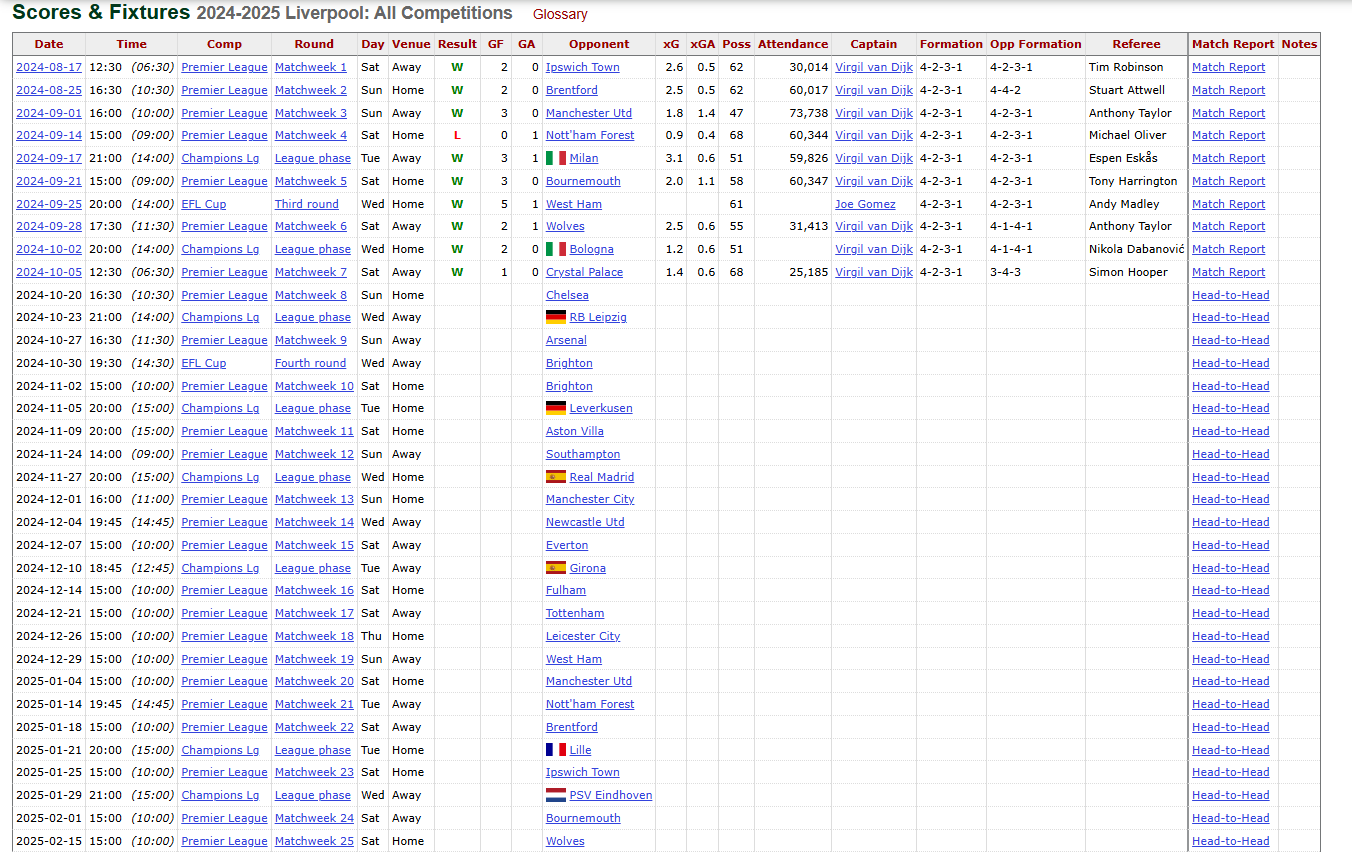

Para lograr extraer el link de cada equipo y postereromente sus estadisticas de todos sus partidos con html, utilizaremos la libreria de python [beautiful-soup](https://beautiful-soup-4.readthedocs.io/en/latest/)

In [ ]:
!pip install BeautifulSoup4

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(data.text)

In [ ]:
standings_table = soup.select('table.stats_table')[0]

links = standings_table.find_all('a')
links = [l.get("href") for l in links]
links = [l for l in links if '/squads/' in l]
links

['/en/squads/822bd0ba/Liverpool-Stats',
 '/en/squads/b8fd03ef/Manchester-City-Stats',
 '/en/squads/cff3d9bb/Chelsea-Stats',
 '/en/squads/18bb7c10/Arsenal-Stats',
 '/en/squads/e4a775cb/Nottingham-Forest-Stats',
 '/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 '/en/squads/fd962109/Fulham-Stats',
 '/en/squads/b2b47a98/Newcastle-United-Stats',
 '/en/squads/8602292d/Aston-Villa-Stats',
 '/en/squads/361ca564/Tottenham-Hotspur-Stats',
 '/en/squads/cd051869/Brentford-Stats',
 '/en/squads/4ba7cbea/Bournemouth-Stats',
 '/en/squads/19538871/Manchester-United-Stats',
 '/en/squads/7c21e445/West-Ham-United-Stats',
 '/en/squads/a2d435b3/Leicester-City-Stats',
 '/en/squads/d3fd31cc/Everton-Stats',
 '/en/squads/b74092de/Ipswich-Town-Stats',
 '/en/squads/47c64c55/Crystal-Palace-Stats',
 '/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats',
 '/en/squads/33c895d4/Southampton-Stats']

In [ ]:
team_urls = [f"https://fbref.com{l}" for l in links]
team_urls

['https://fbref.com/en/squads/822bd0ba/Liverpool-Stats',
 'https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats',
 'https://fbref.com/en/squads/cff3d9bb/Chelsea-Stats',
 'https://fbref.com/en/squads/18bb7c10/Arsenal-Stats',
 'https://fbref.com/en/squads/e4a775cb/Nottingham-Forest-Stats',
 'https://fbref.com/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 'https://fbref.com/en/squads/fd962109/Fulham-Stats',
 'https://fbref.com/en/squads/b2b47a98/Newcastle-United-Stats',
 'https://fbref.com/en/squads/8602292d/Aston-Villa-Stats',
 'https://fbref.com/en/squads/361ca564/Tottenham-Hotspur-Stats',
 'https://fbref.com/en/squads/cd051869/Brentford-Stats',
 'https://fbref.com/en/squads/4ba7cbea/Bournemouth-Stats',
 'https://fbref.com/en/squads/19538871/Manchester-United-Stats',
 'https://fbref.com/en/squads/7c21e445/West-Ham-United-Stats',
 'https://fbref.com/en/squads/a2d435b3/Leicester-City-Stats',
 'https://fbref.com/en/squads/d3fd31cc/Everton-Stats',
 'https://fbref.com/en/squads/

Ahora teniendo el link de cada equipo procederemos a extraer la tabla de estadisticas de los partidos de cada equipo, que a la final esto es lo que nos interesa.

In [ ]:
team_url = team_urls[0]
data = requests.get(team_url)

In [ ]:
!pip install lxml

In [ ]:
import pandas as pd

matches = pd.read_html(data.text, match="Scores & Fixtures")

<ipython-input-9-006488a1d5e0>:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")


In [ ]:
matches[0].head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,2.6,0.5,62.0,30014.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Tim Robinson,Match Report,NaN
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,2.5,0.5,62.0,60017.0,Virgil van Dijk,4-2-3-1,4-4-2,Stuart Attwell,Match Report,NaN
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,1.8,1.4,47.0,73738.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Anthony Taylor,Match Report,NaN
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,0.9,0.4,68.0,60344.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Michael Oliver,Match Report,NaN
4,2024-09-17,21:00,Champions Lg,League phase,Tue,Away,W,3.0,1.0,it Milan,3.1,0.6,51.0,59826.0,Virgil van Dijk,4-2-3-1,4-2-3-1,Espen Eskås,Match Report,NaN


Ahora para complementar nuestro dataframe queremos obtener las estadisticas de disparo de cada partido y eso lo podemos hacer accediendo a el siguiente boton de Shooting
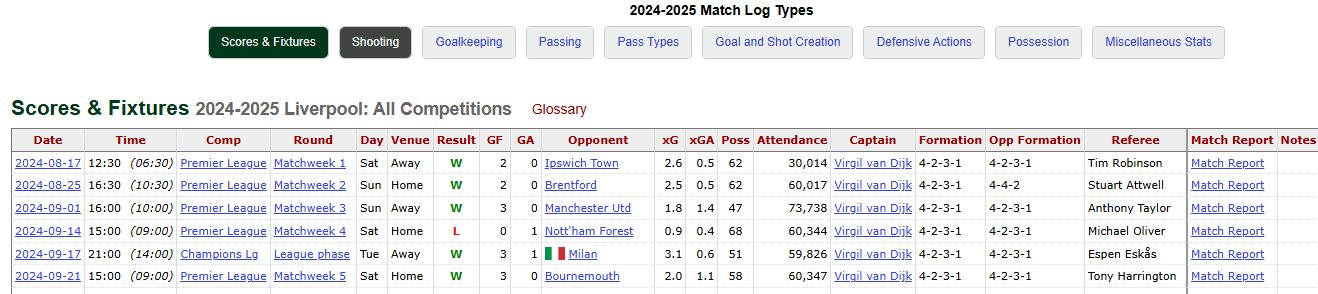

In [ ]:
soup = BeautifulSoup(data.text)

links = soup.find_all('a')
links = [l.get('href') for l in links]
links = [l for l in links if l and 'all_comps/shooting/' in l]
links

['/en/squads/822bd0ba/2024-2025/matchlogs/all_comps/shooting/Liverpool-Match-Logs-All-Competitions',
 '/en/squads/822bd0ba/2024-2025/matchlogs/all_comps/shooting/Liverpool-Match-Logs-All-Competitions',
 '/en/squads/822bd0ba/2024-2025/matchlogs/all_comps/shooting/Liverpool-Match-Logs-All-Competitions',
 '/en/squads/822bd0ba/2024-2025/matchlogs/all_comps/shooting/Liverpool-Match-Logs-All-Competitions']

In [ ]:
data = requests.get(f'https://fbref.com{links[0]}')

In [ ]:
shooting = pd.read_html(data.text, match='Shooting')[0]

<ipython-input-13-ae569d106444>:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match='Shooting')[0]


In [ ]:
shooting.head()

For Liverpool                                                              \
           Date   Time            Comp         Round  Day Venue Result   GF   
0    2024-08-17  12:30  Premier League   Matchweek 1  Sat  Away      W  2.0   
1    2024-08-25  16:30  Premier League   Matchweek 2  Sun  Home      W  2.0   
2    2024-09-01  16:00  Premier League   Matchweek 3  Sun  Away      W  3.0   
3    2024-09-14  15:00  Premier League   Matchweek 4  Sat  Home      L  0.0   
4    2024-09-17  21:00    Champions Lg  League phase  Tue  Away      W  3.0   

                         ... Standard               Expected               \
    GA         Opponent  ...     Dist   FK PK PKatt       xG npxG npxG/Sh   
0  0.0     Ipswich Town  ...     14.8  0.0  0     0      2.6  2.6    0.15   
1  0.0        Brentford  ...     13.6  1.0  0     0      2.5  2.5    0.14   
2  0.0   Manchester Utd  ...     13.4  0.0  0     0      1.8  1.8    0.16   
3  1.0  Nott'ham Forest  ...     14.9  0.0  0     0      0.9  0.9    0.07   
4  1.0         it Milan  ...     15.7  1.0  0     0      3.1  3.1    0.14   

               Unnamed: 25_level_0  
  G-xG np:G-xG        Match Report  
0 -0.6    -0.6        Match Report  
1 -0.5    -0.5        Match Report  
2  1.2     1.2        Match Report  
3 -0.9    -0.9        Match Report  
4 -0.1    -0.1        Match Report  

[5 rows x 26 columns]

In [ ]:
shooting.columns = shooting.columns.droplevel()

In [ ]:
shooting.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Match Report
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,14.8,0.0,0,0,2.6,2.6,0.15,-0.6,-0.6,Match Report
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,13.6,1.0,0,0,2.5,2.5,0.14,-0.5,-0.5,Match Report
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,13.4,0.0,0,0,1.8,1.8,0.16,1.2,1.2,Match Report
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,14.9,0.0,0,0,0.9,0.9,0.07,-0.9,-0.9,Match Report
4,2024-09-17,21:00,Champions Lg,League phase,Tue,Away,W,3.0,1.0,it Milan,...,15.7,1.0,0,0,3.1,3.1,0.14,-0.1,-0.1,Match Report


Ahora vamos a unir el dataframe de matches que creamos anteriormente con el datagrame shooting que tenemos ahora creado.

Lograremos esto con el metodo merge de pandas.

In [ ]:
team_data = matches[0].merge(shooting[['Date', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt']], on='Date')

In [ ]:
matches[0].shape

(49, 20)

In [ ]:
shooting.shape

(18, 26)

In [ ]:
team_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Opp Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,4-2-3-1,Tim Robinson,Match Report,NaN,18,5,14.8,0.0,0,0
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,4-4-2,Stuart Attwell,Match Report,NaN,19,8,13.6,1.0,0,0
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,4-2-3-1,Anthony Taylor,Match Report,NaN,11,3,13.4,0.0,0,0
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,4-2-3-1,Michael Oliver,Match Report,NaN,14,5,14.9,0.0,0,0
4,2024-09-17,21:00,Champions Lg,League phase,Tue,Away,W,3.0,1.0,it Milan,...,4-2-3-1,Espen Eskås,Match Report,NaN,23,11,15.7,1.0,0,0


Lo que acabamos de hacer fue solo para un unico equipo.
Ahora lo haremos para todos con un Loop.

In [ ]:
years = list(range(2025, 2019, -1))
years

[2025, 2024, 2023, 2022, 2021, 2020]

In [ ]:
all_matches = []

standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"

In [ ]:
import time

In [ ]:
for year in years:
  data = requests.get(standings_url)
  soup = BeautifulSoup(data.text)
  standings_table = soup.select('table.stats_table')[0]

  links = [l.get("href") for l in standings_table.find_all('a')]
  links = [l for l in links if '/squads/' in l]
  team_urls = [f"https://fbref.com{l}" for l in links]

  previous_season = soup.select("a.prev")[0].get("href")
  standings_url = f"https://fbref.com{previous_season}"
  print(f"standings_url: {standings_url}")
  print("going to sleep 10 seg before team_url")
  time.sleep(10)

  for team_url in team_urls:
    team_name = team_url.split("/")[-1].replace("-Stats", "").replace("-", " ")
    print(f"team_name: {team_name}")
    data = requests.get(team_url)
    matches = pd.read_html(data.text, match="Scores & Fixtures")[0]

    soup = BeautifulSoup(data.text)
    links = [l.get("href") for l in soup.find_all('a')]
    links = [l for l in links if l and 'all_comps/shooting/' in l]
    data = requests.get(f"https://fbref.com{links[0]}")
    shooting = pd.read_html(data.text, match="Shooting")[0]
    shooting.columns = shooting.columns.droplevel()

    try:
      team_data = matches.merge(shooting[["Date", "Sh", "SoT", "Dist", "FK", "PK", "PKatt"]], on="Date")
      print(f"matches merge with shooting for {team_name}")
    except ValueError:
      continue

    team_data = team_data[team_data["Comp"] == "Premier League"]
    team_data["Season"] = year
    team_data["Team"] = team_name
    all_matches.append(team_data)
    print("going to sleep 10 seg")
    time.sleep(10)

standings_url: https://fbref.com/en/comps/9/2023-2024/2023-2024-Premier-League-Stats
going to sleep 10 seg before team_url
team_name: Liverpool


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Liverpool
going to sleep 10 seg
team_name: Manchester City


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Manchester City
going to sleep 10 seg
team_name: Chelsea


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Chelsea
going to sleep 10 seg
team_name: Arsenal


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Arsenal
going to sleep 10 seg
team_name: Nottingham Forest


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Nottingham Forest
going to sleep 10 seg
team_name: Brighton and Hove Albion


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Brighton and Hove Albion
going to sleep 10 seg
team_name: Fulham


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Fulham
going to sleep 10 seg
team_name: Newcastle United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Newcastle United
going to sleep 10 seg
team_name: Aston Villa


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Aston Villa
going to sleep 10 seg
team_name: Tottenham Hotspur


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Tottenham Hotspur
going to sleep 10 seg
team_name: Brentford


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Brentford
going to sleep 10 seg
team_name: Bournemouth


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Bournemouth
going to sleep 10 seg
team_name: Manchester United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Manchester United
going to sleep 10 seg
team_name: West Ham United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for West Ham United
going to sleep 10 seg
team_name: Leicester City


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Leicester City
going to sleep 10 seg
team_name: Everton


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Everton
going to sleep 10 seg
team_name: Ipswich Town


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Ipswich Town
going to sleep 10 seg
team_name: Crystal Palace


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Crystal Palace
going to sleep 10 seg
team_name: Wolverhampton Wanderers


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Wolverhampton Wanderers
going to sleep 10 seg
team_name: Southampton


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Southampton
going to sleep 10 seg
standings_url: https://fbref.com/en/comps/9/2022-2023/2022-2023-Premier-League-Stats
going to sleep 10 seg before team_url
team_name: Manchester City


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Manchester City
going to sleep 10 seg
team_name: Arsenal


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Arsenal
going to sleep 10 seg
team_name: Liverpool


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Liverpool
going to sleep 10 seg
team_name: Aston Villa


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Aston Villa
going to sleep 10 seg
team_name: Tottenham Hotspur


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Tottenham Hotspur
going to sleep 10 seg
team_name: Chelsea


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Chelsea
going to sleep 10 seg
team_name: Newcastle United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Newcastle United
going to sleep 10 seg
team_name: Manchester United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Manchester United
going to sleep 10 seg
team_name: West Ham United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for West Ham United
going to sleep 10 seg
team_name: Crystal Palace


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Crystal Palace
going to sleep 10 seg
team_name: Brighton and Hove Albion


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Brighton and Hove Albion
going to sleep 10 seg
team_name: Bournemouth


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Bournemouth
going to sleep 10 seg
team_name: Fulham


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Fulham
going to sleep 10 seg
team_name: Wolverhampton Wanderers


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Wolverhampton Wanderers
going to sleep 10 seg
team_name: Everton


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Everton
going to sleep 10 seg
team_name: Brentford


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Brentford
going to sleep 10 seg
team_name: Nottingham Forest


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Nottingham Forest
going to sleep 10 seg
team_name: Luton Town


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Luton Town
going to sleep 10 seg
team_name: Burnley


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Burnley
going to sleep 10 seg
team_name: Sheffield United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Sheffield United
going to sleep 10 seg
standings_url: https://fbref.com/en/comps/9/2021-2022/2021-2022-Premier-League-Stats
going to sleep 10 seg before team_url
team_name: Manchester City


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Manchester City
going to sleep 10 seg
team_name: Arsenal


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Arsenal
going to sleep 10 seg
team_name: Manchester United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Manchester United
going to sleep 10 seg
team_name: Newcastle United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Newcastle United
going to sleep 10 seg
team_name: Liverpool


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Liverpool
going to sleep 10 seg
team_name: Brighton and Hove Albion


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Brighton and Hove Albion
going to sleep 10 seg
team_name: Aston Villa


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Aston Villa
going to sleep 10 seg
team_name: Tottenham Hotspur


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Tottenham Hotspur
going to sleep 10 seg
team_name: Brentford


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Brentford
going to sleep 10 seg
team_name: Fulham


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Fulham
going to sleep 10 seg
team_name: Crystal Palace


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Crystal Palace
going to sleep 10 seg
team_name: Chelsea


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]
<ipython-input-24-e8b0a47fff02>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data["Season"] = year
<ipython-input-24-e8b0a47fff02>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

matches merge with shooting for Chelsea
going to sleep 10 seg
team_name: Wolverhampton Wanderers


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]
<ipython-input-24-e8b0a47fff02>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data["Season"] = year
<ipython-input-24-e8b0a47fff02>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

matches merge with shooting for Wolverhampton Wanderers
going to sleep 10 seg
team_name: West Ham United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for West Ham United
going to sleep 10 seg
team_name: Bournemouth


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Bournemouth
going to sleep 10 seg
team_name: Nottingham Forest


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Nottingham Forest
going to sleep 10 seg
team_name: Everton


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Everton
going to sleep 10 seg
team_name: Leicester City


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Leicester City
going to sleep 10 seg
team_name: Leeds United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]
<ipython-input-24-e8b0a47fff02>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data["Season"] = year
<ipython-input-24-e8b0a47fff02>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

matches merge with shooting for Leeds United
going to sleep 10 seg
team_name: Southampton


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Southampton
going to sleep 10 seg
standings_url: https://fbref.com/en/comps/9/2020-2021/2020-2021-Premier-League-Stats
going to sleep 10 seg before team_url
team_name: Manchester City


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Manchester City
going to sleep 10 seg
team_name: Liverpool


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Liverpool
going to sleep 10 seg
team_name: Chelsea


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Chelsea
going to sleep 10 seg
team_name: Tottenham Hotspur


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Tottenham Hotspur
going to sleep 10 seg
team_name: Arsenal


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Arsenal
going to sleep 10 seg
team_name: Manchester United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Manchester United
going to sleep 10 seg
team_name: West Ham United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for West Ham United
going to sleep 10 seg
team_name: Leicester City


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Leicester City
going to sleep 10 seg
team_name: Brighton and Hove Albion


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Brighton and Hove Albion
going to sleep 10 seg
team_name: Wolverhampton Wanderers


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Wolverhampton Wanderers
going to sleep 10 seg
team_name: Newcastle United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Newcastle United
going to sleep 10 seg
team_name: Crystal Palace


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Crystal Palace
going to sleep 10 seg
team_name: Brentford


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Brentford
going to sleep 10 seg
team_name: Aston Villa


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Aston Villa
going to sleep 10 seg
team_name: Southampton


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Southampton
going to sleep 10 seg
team_name: Everton


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Everton
going to sleep 10 seg
team_name: Leeds United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Leeds United
going to sleep 10 seg
team_name: Burnley


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Burnley
going to sleep 10 seg
team_name: Watford


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Watford
going to sleep 10 seg
team_name: Norwich City


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Norwich City
going to sleep 10 seg
standings_url: https://fbref.com/en/comps/9/2019-2020/2019-2020-Premier-League-Stats
going to sleep 10 seg before team_url
team_name: Manchester City


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Manchester City
going to sleep 10 seg
team_name: Manchester United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Manchester United
going to sleep 10 seg
team_name: Liverpool


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Liverpool
going to sleep 10 seg
team_name: Chelsea


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Chelsea
going to sleep 10 seg
team_name: Leicester City


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Leicester City
going to sleep 10 seg
team_name: West Ham United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for West Ham United
going to sleep 10 seg
team_name: Tottenham Hotspur


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Tottenham Hotspur
going to sleep 10 seg
team_name: Arsenal


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Arsenal
going to sleep 10 seg
team_name: Leeds United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Leeds United
going to sleep 10 seg
team_name: Everton


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Everton
going to sleep 10 seg
team_name: Aston Villa


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Aston Villa
going to sleep 10 seg
team_name: Newcastle United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Newcastle United
going to sleep 10 seg
team_name: Wolverhampton Wanderers


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Wolverhampton Wanderers
going to sleep 10 seg
team_name: Crystal Palace


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Crystal Palace
going to sleep 10 seg
team_name: Southampton


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Southampton
going to sleep 10 seg
team_name: Brighton and Hove Albion


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Brighton and Hove Albion
going to sleep 10 seg
team_name: Burnley


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Burnley
going to sleep 10 seg
team_name: Fulham


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Fulham
going to sleep 10 seg
team_name: West Bromwich Albion


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for West Bromwich Albion
going to sleep 10 seg
team_name: Sheffield United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Sheffield United
going to sleep 10 seg
standings_url: https://fbref.com/en/comps/9/2018-2019/2018-2019-Premier-League-Stats
going to sleep 10 seg before team_url
team_name: Liverpool


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Liverpool
going to sleep 10 seg
team_name: Manchester City


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Manchester City
going to sleep 10 seg
team_name: Manchester United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Manchester United
going to sleep 10 seg
team_name: Chelsea


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Chelsea
going to sleep 10 seg
team_name: Leicester City


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Leicester City
going to sleep 10 seg
team_name: Tottenham Hotspur


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Tottenham Hotspur
going to sleep 10 seg
team_name: Wolverhampton Wanderers


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Wolverhampton Wanderers
going to sleep 10 seg
team_name: Arsenal


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Arsenal
going to sleep 10 seg
team_name: Sheffield United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Sheffield United
going to sleep 10 seg
team_name: Burnley


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Burnley
going to sleep 10 seg
team_name: Southampton


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Southampton
going to sleep 10 seg
team_name: Everton


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Everton
going to sleep 10 seg
team_name: Newcastle United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Newcastle United
going to sleep 10 seg
team_name: Crystal Palace


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Crystal Palace
going to sleep 10 seg
team_name: Brighton and Hove Albion


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Brighton and Hove Albion
going to sleep 10 seg
team_name: West Ham United


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for West Ham United
going to sleep 10 seg
team_name: Aston Villa


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Aston Villa
going to sleep 10 seg
team_name: Bournemouth


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Bournemouth
going to sleep 10 seg
team_name: Watford


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Watford
going to sleep 10 seg
team_name: Norwich City


<ipython-input-24-e8b0a47fff02>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  matches = pd.read_html(data.text, match="Scores & Fixtures")[0]
<ipython-input-24-e8b0a47fff02>:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  shooting = pd.read_html(data.text, match="Shooting")[0]


matches merge with shooting for Norwich City
going to sleep 10 seg


In [ ]:
match_df = pd.concat(all_matches)

In [ ]:
match_df.columns = [c.lower() for c in match_df.columns]

In [ ]:
match_df.to_csv("matches-3.csv")

In [ ]:
match_df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,Match Report,NaN,18.0,5.0,14.8,0.0,0,0,2025,Liverpool
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,Match Report,NaN,19.0,8.0,13.6,1.0,0,0,2025,Liverpool
2,2024-09-01,16:00,Premier League,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,Match Report,NaN,11.0,3.0,13.4,0.0,0,0,2025,Liverpool
3,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,Match Report,NaN,14.0,5.0,14.9,0.0,0,0,2025,Liverpool
5,2024-09-21,15:00,Premier League,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,...,Match Report,NaN,19.0,12.0,16.6,0.0,0,0,2025,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2020-07-07,18:00,Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,...,Match Report,NaN,12.0,3.0,16.9,1.0,0,0,2020,Norwich City
39,2020-07-11,12:30,Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,...,Match Report,NaN,11.0,2.0,19.8,1.0,0,0,2020,Norwich City
40,2020-07-14,20:15,Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,...,Match Report,NaN,2.0,0.0,20.6,0.0,0,0,2020,Norwich City
41,2020-07-18,17:30,Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,...,Match Report,NaN,6.0,2.0,13.4,0.0,0,0,2020,Norwich City


In [ ]:
match_df.shape

(4020, 28)

In [ ]:
38 * 20 * 5

3800

In [ ]:
match_df["team"].value_counts()

,count
team,
Liverpool,201
Aston Villa,201
Wolverhampton Wanderers,201
Crystal Palace,201
Everton,201
Manchester City,201
Manchester United,201
Tottenham Hotspur,201
West Ham United,201


# **3. Descripción de las caracteristicas**
Detalla las características o variables que estarán disponibles en los datos. Describe
brevemente cada una y explica por qué es relevante para el problema que estás intentando
resolver.
Menciona si las características son numéricas, categóricas o de otro tipo. Esto será clave
para saber cómo se utilizarán más adelante en el modelo.


In [ ]:
match_df.info()

# Características del conjunto de datos para la predicción de resultados en la Premier League

## 1. Información del partido
- **`date` (Fecha del partido)**: *Categórica (ordinal)*
  - Indica la fecha en la que se jugó el partido. Útil para identificar patrones temporales en el rendimiento del equipo.
  
- **`venue` (Local/Visitante)**: *Categórica*
  - Indica si el partido se jugó en casa (Home) o fuera (Away). Los equipos tienden a tener mejor rendimiento como locales.

- **`round` (Jornada del partido)**: *Categórica*
  - Define en qué ronda o jornada se jugó el partido. Puede ayudar a entender el contexto del rendimiento durante la temporada.

## 2. Rendimiento del equipo
- **`gf` (Goles a favor)**: *Numérica*
  - Número de goles marcados por el equipo en el partido. Determina directamente el resultado del partido.

- **`ga` (Goles en contra)**: *Numérica*
  - Número de goles concedidos al oponente. Es crucial para evaluar la efectividad defensiva.

- **`xg` (Goles esperados)**: *Numérica*
  - Estima los goles que se esperaban marcar según las oportunidades creadas. Mide el rendimiento ofensivo del equipo.

- **`xga` (Goles esperados contra)**: *Numérica*
  - Estima los goles que se esperaban conceder. Útil para evaluar la defensa del equipo.

- **`poss` (Posesión)**: *Numérica*
  - Porcentaje de posesión de balón del equipo. Una mayor posesión indica control del partido.

## 3. Estrategia y alineación
- **`formation` (Formación del equipo)**: *Categórica*
  - Describe la táctica utilizada por el equipo (e.g., 4-4-2, 3-5-2). Influye en el estilo de juego.

- **`opp formation` (Formación del oponente)**: *Categórica*
  - Formato táctico del equipo rival. Puede afectar el rendimiento del equipo.

## 4. Estadísticas de tiros y oportunidades
- **`sh` (Tiros)**: *Numérica*
  - Número total de tiros realizados por el equipo. Indica la cantidad de oportunidades de gol generadas.

- **`sot` (Tiros a puerta)**: *Numérica*
  - Número de tiros que fueron dirigidos a la portería. Una mayor cantidad sugiere un ataque más preciso.

- **`dist` (Distancia promedio de los tiros)**: *Numérica*
  - Distancia promedio desde la cual se realizaron los tiros. Los tiros más cercanos a la portería suelen ser más efectivos.

- **`fk` (Tiros libres)**: *Numérica*
  - Número de tiros libres a favor del equipo. Las oportunidades a balón parado son importantes en la definición de un partido.

- **`pk` (Penaltis marcados)** y **`pkatt` (Penaltis intentados)**: *Numéricas*
  - Indican cuántos penaltis fueron marcados y cuántos intentados. Son oportunidades críticas para cambiar el resultado del partido.

## 5. Información adicional
- **`attendance` (Asistencia)**: *Numérica*
  - Número de espectadores en el partido. Puede influir en el rendimiento del equipo, especialmente si se juega en casa.

- **`result` (Resultado)**: *Categórica*
  - Variable objetivo que indica si el equipo ganó (W), perdió (L) o empató (D). Es el valor que se desea predecir con el modelo.

- **`season` (Temporada)**: *Numérica*
  - Temporada en la que se jugó el partido. Permite comparar el rendimiento a lo largo de diferentes periodos.

- **`team` (Equipo)**: *Categórica*
  - Nombre del equipo que está siendo evaluado. Identifica el conjunto de datos específicos para cada equipo.


# **4. Creación del DataFrame**
Usa el código necesario para extraer los datos de la fuente y mostrar la estructura del DataFrame

In [ ]:
match_df.head()